# Place of Birth of the Foreign-Born Population

### Top Countries

In [05-nativity.ipynb](./05-nativity.ipynb) we saw that around a third of the residents of Great Neck are Foreign-Born, and that has been true since the start of the 5-year ACS in 2009. But where are they from? And has that location changed over time? To answer that we can look at [B05006: Place of Birth for the Foreign-born Population in the United States](https://censusreporter.org/data/table/?table=B05006&geo_ids=97000US3612510&primary_geo_id=97000US3612510). Let's start by looking at the 2019 data:

In [1]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2019],
    group="B05006",
    state=NY,
    school_district_unified="12510",
)
df

.

,Total,Europe,Northern Europe,Ireland,Denmark,Norway,Sweden,United Kingdom (inc. Crown Dependencies),"United Kingdom, excluding England and Scotland",England,...,Ecuador,Guyana,Peru,Uruguay,Venezuela,Other South America,Northern America,Canada,Other Northern America,Year
0,14289,1821,220,48,0,0,18,154,42,84,...,30,27,90,0,0,8,93,93,0,2019


The data is a bit hard to read in this format. Let's transpose the dataframe and then sort it:

In [2]:
(df.T.sort_values(0, ascending=False).head(15))

,0
Total,14289
Asia,11013
Eastern Asia,5047
South Central Asia,4701
China,3768
Iran,3723
"China, excluding Hong Kong and Taiwan",2726
Year,2019
Europe,1821
Americas,1270


One thing to note about this dataframe is that some of the columns contain aggregate data. For exampe: "Total" can be viewed as the sum of the continent rows like "Asia and "Europe". Isolating just the country-level rows it looks like China, Iran and Korea are the top countries in 2019.

It's also notable that Great Neck has roughly the same population of Foreign-Born from both China and Iran. A quick google search shows that in 2019 China had a population of 1.408 billion and Iran has a population is 87 million.

## Top Countries Over Time

### First Attempt: `download_multiyear`

Let's try to use `download_multiyear` to see how the number of residents from China, Iran and Korea changed over the course of the 5-year ACS (2009-2019).

In [3]:
df = download_multiyear(
    dataset=ACS5,
    vintages=[2009, 2014, 2019],
    group="B05006",
    state=NY,
    school_district_unified="12510",
    prompt=False,
)
df

	'Estimate!!Total!!Europe!!Northern Europe!!United Kingdom (inc. Crown Dependencies)' in [2009, 2014]
	'Estimate!!Total!!Europe!!Northern Europe!!Ireland' in [2019]
	'Estimate!!Total!!Europe!!Northern Europe!!United Kingdom (inc. Crown Dependencies)!!United Kingdom, excluding England and Scotland' in [2009, 2014]
	'Estimate!!Total!!Europe!!Northern Europe!!Denmark' in [2019]
	'Estimate!!Total!!Europe!!Northern Europe!!United Kingdom (inc. Crown Dependencies)!!England' in [2009, 2014]
	'Estimate!!Total!!Europe!!Northern Europe!!Norway' in [2019]
	'Estimate!!Total!!Europe!!Northern Europe!!United Kingdom (inc. Crown Dependencies)!!Scotland' in [2009, 2014]
	'Estimate!!Total!!Europe!!Northern Europe!!Sweden' in [2019]
	'Estimate!!Total!!Europe!!Northern Europe!!Ireland' in [2009, 2014]
	'Estimate!!Total!!Europe!!Northern Europe!!United Kingdom (inc. Crown Dependencies)' in [2019]
	'Estimate!!Total!!Europe!!Northern Europe!!Denmark' in [2009, 2014]
	'Estimate!!Total!!Europe!!Northern Europ

CensusApiException: Census API request to https://api.census.gov/data/2009/acs/acs5/variables/B05006_162E.json failed with status 404. <!doctype html><html lang="en"><head><title>HTTP Status 404 – Not Found</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 404 – Not Found</h1></body></html>

This fails because some of the columns in this table have changed over time. That's what each of these warnings means.

### Selecting Columns

My next step was to wonder whether the columns that I actually care about have changed over the years. I am not sure the best way to do this, but after reading the [Exploring Variables](https://github.com/censusdis/censusdis/blob/main/notebooks/Exploring%20Variables.ipynb) notebook in the `censusdis` repo I realized that one way would be to view the Census API pages for each (year, table) combination that I am interested in: [2019](https://api.census.gov/data/2019/acs/acs5/groups/B05006.html), [2014](https://api.census.gov/data/2014/acs/acs5/groups/B05006.html), [2009](https://api.census.gov/data/2009/acs/acs5/groups/B05006.html).

Searching those pages for "China", "Iran" and "Korea" you can see that: 
 * China was consistently assigned `B05006_049E`. 
 * Iran was consistently assigned `B05006_060E`.
 * Korea was consistently assigned `B05006_054E`.

### New Function: download_multiyear_variables

I previously wrote a function `download_multiyear` to get all columns for a single table (called `group` in censusdis). I just wrote a new function, `download_multiyear_variables` to do something similar, but just for a handful of variables. Here is how to use it to download the data we are interested in:

In [4]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear_variables

df = download_multiyear_variables(
    dataset=ACS5,
    vintages=[2009, 2014, 2019],
    download_variables=["B05006_049E", "B05006_060E", "B05006_054E"],
    state=NY,
    school_district_unified="12510",
    drop_cols=True,
)
df

...

,China,Iran,Korea,Year
0,1543,4424,857,2009
0,2593,5168,918,2014
0,3768,3723,1179,2019


In [ ]:
# Intentionally trigger warning
#B05006_004E
download_multiyear_variables(
    dataset=ACS5,
    vintages=[2009, 2014, 2019],
    download_variables=["B05006_004E"],
    state=NY,
    school_district_unified="12510",
    drop_cols=True,
)

	'Estimate!!Total!!Europe!!Northern Europe!!United Kingdom (inc. Crown Dependencies)' in [2009, 2014]
	'Estimate!!Total!!Europe!!Northern Europe!!Ireland' in [2019]


,Ireland,Year
0,220,2009
0,137,2014
0,48,2019


We can graph the data using `graph_multiyear`, as before.

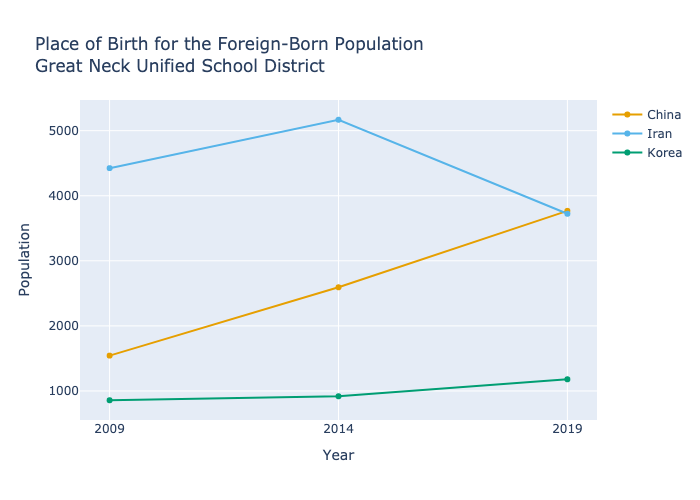

In [6]:
from utils import graph_multiyear

graph_multiyear(
    df,
    "Place of Birth for the Foreign-Born Population<br>Great Neck Unified School District",
    "Population",
)

And we can also graph the percent change as before.

   China  Iran  Korea  Year
0    NaN   NaN    NaN  2009
0   68.0  16.8    7.1  2014
0   45.3 -28.0   28.4  2019


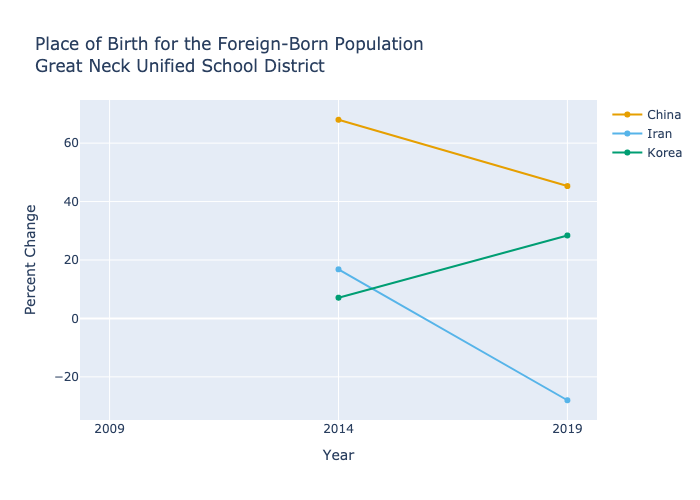

In [7]:
from utils import pct_change_multiyear

df_percent_change = pct_change_multiyear(df)
print(df_percent_change)

graph_multiyear(
    df_percent_change,
    "Place of Birth for the Foreign-Born Population<br>Great Neck Unified School District",
    "Percent Change",
)